In [10]:
%matplotlib inline


# SVM Exercise


A tutorial exercise for using different SVM kernels.




In [2]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from IPython.display import display_html


def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-right:30px"'),raw=True)

Automatically created module for IPython interactive environment


In [3]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]
# print(X.shape)

In [4]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X = iris.data
y = iris.target


X = X[y != 0, :2]
y = y[y != 0]
print(X.shape)

(100, 2)


In [6]:
n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
def plot_boundary(clf, kernel):
    plt.figure("Linear SVM")
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [8]:
# fit the model

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7
Precision: 0.6363636363636364
Recall: 0.7777777777777778
F1 score: 0.7000000000000001
Confusion Matrix:
 [[7 2]
 [4 7]]


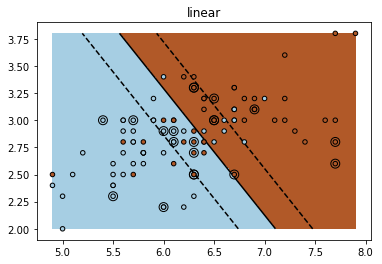

Accuracy: 0.7


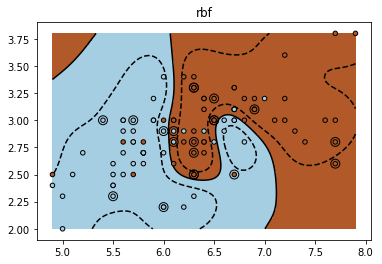

Accuracy: 0.65


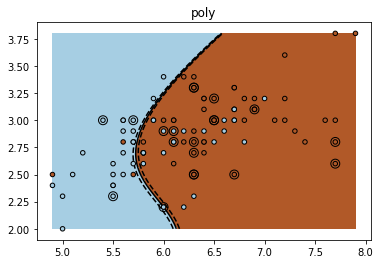

Accuracy: 0.7


In [9]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    plot_boundary(clf, kernel)
    
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

Dataset description 
    1. mpg: continuous (target)
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)

In [14]:
df = pd.read_csv("../data/auto-mpg.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"chevrolet,chevelle,malibu"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"buick,skylark,320"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"plymouth,satellite"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"amc,rebel,sst"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"ford,torino"


In [15]:
## Because of missing value we replace the nan with mean
df = df[df!='?']
df= df.dropna(how='any')
df[3] = df[3].astype('float64')

In [16]:
Y = df[[0]]
X = df.loc[:,[1,2,3,4,5,6,7]]

In [17]:
X = X.values
Y = Y.values

In [18]:
scaler1, scaler2 = StandardScaler(), StandardScaler()
data_X = scaler1.fit_transform(X)
data_Y = scaler2.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

clf = SVR(C=1.0, epsilon=0.0)
clf.fit(X_train, Y_train) 

prediction = clf.predict(X_test)
print("MSE: %.2f"% mean_squared_error(Y_test, prediction))

MSE: 0.11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
pred, actual = pd.DataFrame(scaler2.inverse_transform(prediction)), pd.DataFrame(scaler2.inverse_transform(Y_test))
pred[0], actual[0] = pred[0].astype('int64'), actual[0].astype('int64')
display_side_by_side(pred.head(), actual.head())

,0
0,27
1,24
2,12
3,34
4,34
,0
0,28
1,22
2,12
3,38


<Figure size 432x288 with 0 Axes>

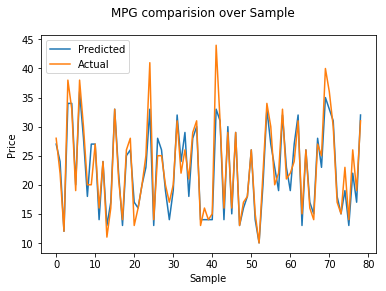

In [20]:
fig = plt.figure()
plt.plot(pred.values[:100],label="Predicted")
plt.plot(actual.values[:100],label="Actual")
plt.legend()
fig.suptitle('MPG comparision over Sample')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.show()